In [15]:
import re, string, unicodedata
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
import pandas as pd
import numpy as np
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
text_data =pd.read_csv(r"noticias.csv")
text_data

,periodico,titulo,cuerpo,fecha,categoria
0,La Razon,El Gobierno refuerza plan para ‘insertar’ 11.0...,"De cara a la crisis, el Gobierno reforzó los p...",01-07-2020,economia
1,La Razon,Revilla descarta incremento de pasajes y Arias...,Varios sindicatos del transporte público se ha...,01-07-2020,sociedad
2,La Razon,Murillo ordena buscar a cabecillas del ‘grupo ...,"El ministro de Gobierno, Arturo Murillo, anunc...",01-07-2020,sociedad
3,La Razon,Más de 100 militares de Colombia implicados en...,El alto mando del ejército de Colombia reconoc...,01-07-2020,mundial
4,La Razon,Las fiestas julias serán con pocas personas y ...,Las fiestas julias de este año serán distintas...,01-07-2020,sociedad
...,...,...,...,...,...
239,Pagina 7,India prohibe Tik Tok por razones de seguridad,India prohibió el lunes 59 aplicaciones chinas...,30-6-2020,mundial
240,Pagina 7,Cirque du Soleil se declara en quiebra y pide ...,"El Cirque du Soleil, una de las empresas de es...",30-6-2020,mundial
241,Pagina 7,Coronavirus: ¿ha perdido agresividad el SARS-C...,Según la definición de la Real Academia Españo...,30-6-2020,mundial
242,Pagina 7,Un cumpleaños centenario y simbólico para Anto...,"El hombre que dejó escrito que ""lo esencial es...",29-6-2020,mundial


In [17]:
noticia = text_data.cuerpo.str.cat(sep=' ')
#function to split text into word
tokens = word_tokenize(noticia)
vocabulary = set(tokens)
print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]

15685


['de',
 ',',
 'la',
 '.',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'se',
 'del',
 'las',
 'un',
 'para',
 'por',
 'con',
 'una',
 'no',
 'su',
 'es',
 ')',
 '(',
 'al',
 'El',
 '“',
 '”',
 'La',
 'más',
 'como',
 'lo',
 '``',
 'sus',
 'En',
 'este',
 'pero',
 'o',
 ':',
 "''",
 'ha',
 'fue',
 'está',
 'país',
 'ser',
 ';',
 'entre',
 'esta',
 'ya',
 'son',
 'personas']

In [18]:
stop_words = set(stopwords.words('spanish'))
tokens = [w for w in tokens if not w in stop_words]

In [19]:
noticia = text_data.cuerpo.str.cat(sep=' ')
#function to split text into word
tokens = word_tokenize(noticia)
vocabulary = set(tokens)
print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:100]

15685


['de',
 ',',
 'la',
 '.',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'se',
 'del',
 'las',
 'un',
 'para',
 'por',
 'con',
 'una',
 'no',
 'su',
 'es',
 ')',
 '(',
 'al',
 'El',
 '“',
 '”',
 'La',
 'más',
 'como',
 'lo',
 '``',
 'sus',
 'En',
 'este',
 'pero',
 'o',
 ':',
 "''",
 'ha',
 'fue',
 'está',
 'país',
 'ser',
 ';',
 'entre',
 'esta',
 'ya',
 'son',
 'personas',
 'pandemia',
 'porque',
 'si',
 'dijo',
 'tiene',
 'también',
 'desde',
 'años',
 '%',
 'casos',
 'todo',
 'sobre',
 'Bolivia',
 'coronavirus',
 'han',
 'le',
 'hasta',
 'hay',
 'muy',
 'ese',
 'dos',
 'están',
 'Los',
 'parte',
 'contra',
 'millones',
 'Gobierno',
 'sin',
 'puede',
 'salud',
 'nos',
 'todos',
 'e',
 'otros',
 'esa',
 'No',
 'Covid-19',
 'días',
 'Es',
 'tres',
 '?',
 'mi',
 'era',
 'Por',
 'virus',
 'cuenta',
 'menos',
 'donde',
 'cuando',
 'hace']

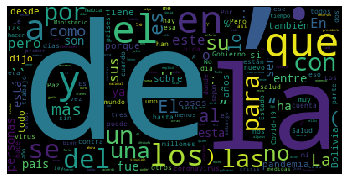

In [20]:
#se tiene que instalar:  python -m pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [22]:
X_train = text_data.loc[:200, 'cuerpo'].values
y_train = text_data.loc[:200, 'categoria'].values
X_test = text_data.loc[201:, 'cuerpo'].values
y_test = text_data.loc[201:, 'categoria'].values

In [23]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)
print(train_vectors.shape, test_vectors.shape)

(201, 10954) (43, 10954)


In [24]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(train_vectors, y_train)

In [27]:
from  sklearn.metrics  import accuracy_score
predicted = clf.predict(test_vectors)
print(accuracy_score(y_test,predicted))

0.7125630148237981
